In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [ ]:
rad = 2000. # radius of cylinder in m
g = 1. # effective gravity in g (i.e. * 9.8 m/s/s)

v_rel = np.array([-200,300,0]) # velocity of shot, relative to rotating frame
h = 1 # height of origin, in m

tmax = 50 # time to integrate over
tsteps = 1000 # number of timesteps to plot



In [ ]:
# Calculate trajectories
r0 = np.array([rad-h,0,0])
g*=9.81
w=np.sqrt(g/rad)
v_rot = w*(rad-h)
v = v_rel[:]
v[1]+=v_rot

t = np.linspace(0,tmax,tsteps)
r_lin = r0[:,np.newaxis]+v[:,np.newaxis]*t

coswt = np.cos(t*w)
sinwt = np.sin(t*w)

r = np.zeros((3,tsteps))
r[0] = r_lin[0]*coswt + r_lin[1]*sinwt
r[1] = -r_lin[0]*sinwt + r_lin[1]*coswt
r[2] = r_lin[2]

r = r[:,np.sum(r[0:2]**2,axis=0)<rad**2]


In [ ]:
# Coordinates of cylinder, for plotting
cx = np.linspace(-rad,rad,100)
cz = np.linspace(-rad,rad,10)
X,Z = np.meshgrid(cx,cz)
Y = np.sqrt(rad**2-X**2)


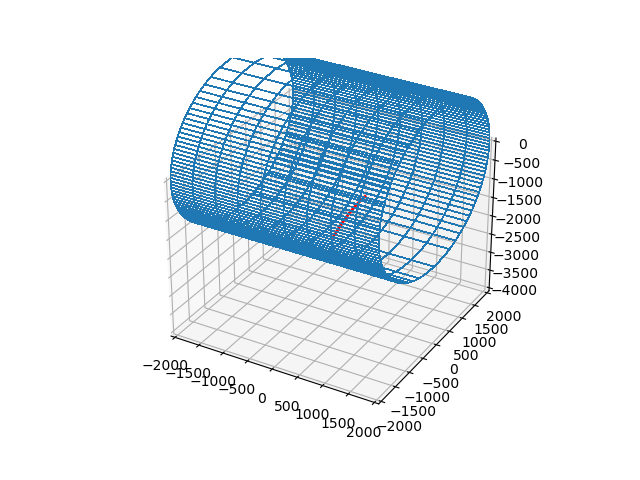

In [ ]:
# plot
plt.close('all')
#plt.ion() # for interactive plots in jupyter
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(r[2],r[1],-r[0],linewidth=2,c='red')
ax.plot_wireframe(Z, Y, X,
                    antialiased=False,linewidth=0.5)
ax.plot_wireframe(Z, -Y, X,
                       antialiased=False,linewidth=0.5)
# ax.set_xlim(-rad,rad)
# ax.set_ylim(-rad,rad)
# ax.set_zlim(-rad,rad)


viewport = rad
ax.set_xlim(-viewport,viewport)
ax.set_zlim(-rad-viewport,-rad+viewport)
ax.set_ylim(-viewport,viewport)
plt.show()